In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Reading Data

In [10]:
data = pd.read_csv('Demo.csv', error_bad_lines=False, encoding = 'unicode_escape');
data_text = data[['tweet']]
data_text['index'] = data_text.index
documents = data_text

In [11]:
len(documents)

4006

In [12]:
documents[:5]

,tweet,index
0,RT @rssurjewala: Critical question: Was PayTM ...,0
1,RT @Hemant_80: Did you vote on #Demonetization...,1
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",2
3,RT @ANI_news: Gurugram (Haryana): Post office ...,3
4,RT @satishacharya: Reddy Wedding! @mail_today ...,4


In [13]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [14]:
import nltk

# Defining stemmer

In [15]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


# Preprocessing

In [16]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Previewing preprocessor function

In [17]:
doc_sample = documents[documents['index'] == 4000].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))
#docc=(preprocess(doc_sample))

original document: 
['RT', '@ModiBharosa:', 'Putting', 'Nation', 'over', 'Party', 'Politics', '#nitishkumar', 'supports', 'PM', '@narendramodi', 'on', '#Demonetization', 'https://t.co/UodwXdPMmG']


 tokenized and lemmatized document: 
['modibharosa', 'put', 'nation', 'parti', 'polit', 'nitishkumar', 'support', 'narendramodi', 'demonet', 'https', 'uodwxdpmmg']


# Applying preprocessor on tweets

In [18]:
processed_docs = documents['tweet'].astype(str).map(preprocess)

In [19]:
import gensim
from gensim import corpora, models

# Creating the doc2bow dictionary for words in the dataset and applying the LDA model from gensim

In [20]:
wordDict = corpora.Dictionary(processed_docs)
docTermMatrix = [wordDict.doc2bow(doc) for doc in processed_docs]
Lda = gensim.models.ldamodel.LdaModel
model = Lda(docTermMatrix,num_topics=10,id2word=wordDict,passes=100)
print(model.print_topics(num_topics=10, num_words=10))

[(0, '0.087*"demonet" + 0.038*"https" + 0.026*"say" + 0.025*"explain" + 0.023*"tweet" + 0.022*"drgpradhan" + 0.021*"prob" + 0.021*"have" + 0.021*"minimathur" + 0.021*"bibi"'), (1, '0.097*"demonet" + 0.055*"https" + 0.023*"dasshaktikanta" + 0.021*"note" + 0.020*"survey" + 0.018*"result" + 0.018*"finminindia" + 0.018*"respons" + 0.017*"announc" + 0.016*"heteyum"'), (2, '0.105*"demonet" + 0.046*"paytm" + 0.045*"question" + 0.044*"critic" + 0.044*"go" + 0.044*"requir" + 0.044*"inform" + 0.043*"clear" + 0.043*"rssurjewala" + 0.043*"disclosur"'), (3, '0.119*"lakh" + 0.118*"bank" + 0.117*"demonet" + 0.112*"terrorist" + 0.112*"loot" + 0.112*"kishtwar" + 0.111*"incid" + 0.111*"gauravcsaw" + 0.006*"usual" + 0.004*"nois"'), (4, '0.088*"demonet" + 0.023*"https" + 0.020*"peopl" + 0.016*"centerofright" + 0.015*"money" + 0.014*"line" + 0.014*"atm" + 0.014*"cash" + 0.013*"citizen" + 0.012*"corrupt"'), (5, '0.083*"demonet" + 0.037*"https" + 0.024*"modi" + 0.021*"opposit" + 0.017*"oppos" + 0.016*"center

In [26]:
model.print_topic(5)

'0.083*"demonet" + 0.037*"https" + 0.024*"modi" + 0.021*"opposit" + 0.017*"oppos" + 0.016*"centerofright" + 0.016*"india" + 0.015*"onlin" + 0.015*"cash" + 0.014*"stop"'

# Visualization of the LDA model

In [27]:
import pyLDAvis.gensim

In [28]:
pyLDAvis.enable_notebook()

In [29]:
vis = pyLDAvis.gensim.prepare(model, docTermMatrix, dictionary=wordDict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.052980 -0.197698       1        1  15.290310
1      0.105120  0.084857       2        1  12.654525
8      0.021714 -0.278360       3        1  12.348667
3     -0.322313  0.124468       4        1  10.556457
4      0.061857  0.085991       5        1  10.420112
5      0.106042  0.114069       6        1   9.347833
0      0.089897  0.093433       7        1   7.837969
7      0.103776  0.106406       8        1   7.799051
6      0.007051 -0.082568       9        1   7.426981
2     -0.226123 -0.050597      10        1   6.318095, topic_info=           Term        Freq        Total Category  logprob  loglift
55         lakh  473.000000   473.000000  Default  30.0000  30.0000
57    terrorist  444.000000   444.000000  Default  29.0000  29.0000
54     kishtwar  442.000000   442.000000  Default  28.0000  28.0000
56         loot  442.000000   442.000000  Default  27.0000  27.0000
52   gauravcsaw  442.000000   442.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
59         call   27.336397    67.034927  Topic10  -4.4629   1.8648
83        parti   97.000565   425.277100  Topic10  -3.1964   1.2837
60         join   25.712080    81.432686  Topic10  -4.5241   1.6089
2       demonet  248.492508  3850.002686  Topic10  -2.2557   0.0213
309       rural    4.871557     8.346336  Topic10  -6.1877   2.2233

[477 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
133       5  0.931265        acquir
255       1  0.981546        action
709       4  0.791529        actual
378       9  0.993157       address
2293      8  0.922775        advanc
...     ...       ...           ...
1062      3  0.809888       ysjagan
1063      3  0.910346         ysrcp
458       3  0.124997     ysrcparti
458       5  0.843729     ysrcparti
254       1  0.954086  zeenewssport

[561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 9, 4, 5, 6, 1, 8, 7, 3])

From this analysis it is found that topic number 2,5,6,7,8 are plotted closer to each other in the graph as they talk more about demonetization and related terms such as money, bank, atm, note etc. where as the topic number 1,3 and 9 talk about goverment and related terms such as politics, vote, nation, people etc. hence they are close to each other but away from the other cluster of topics.

# Plot of the word counts and the weights(importance) of each keyword in the same chart.

Plot just to find out the importance (weights) of the keywords in every topic. Hence, plotting the word counts and the weights of each keyword in the same chart.

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

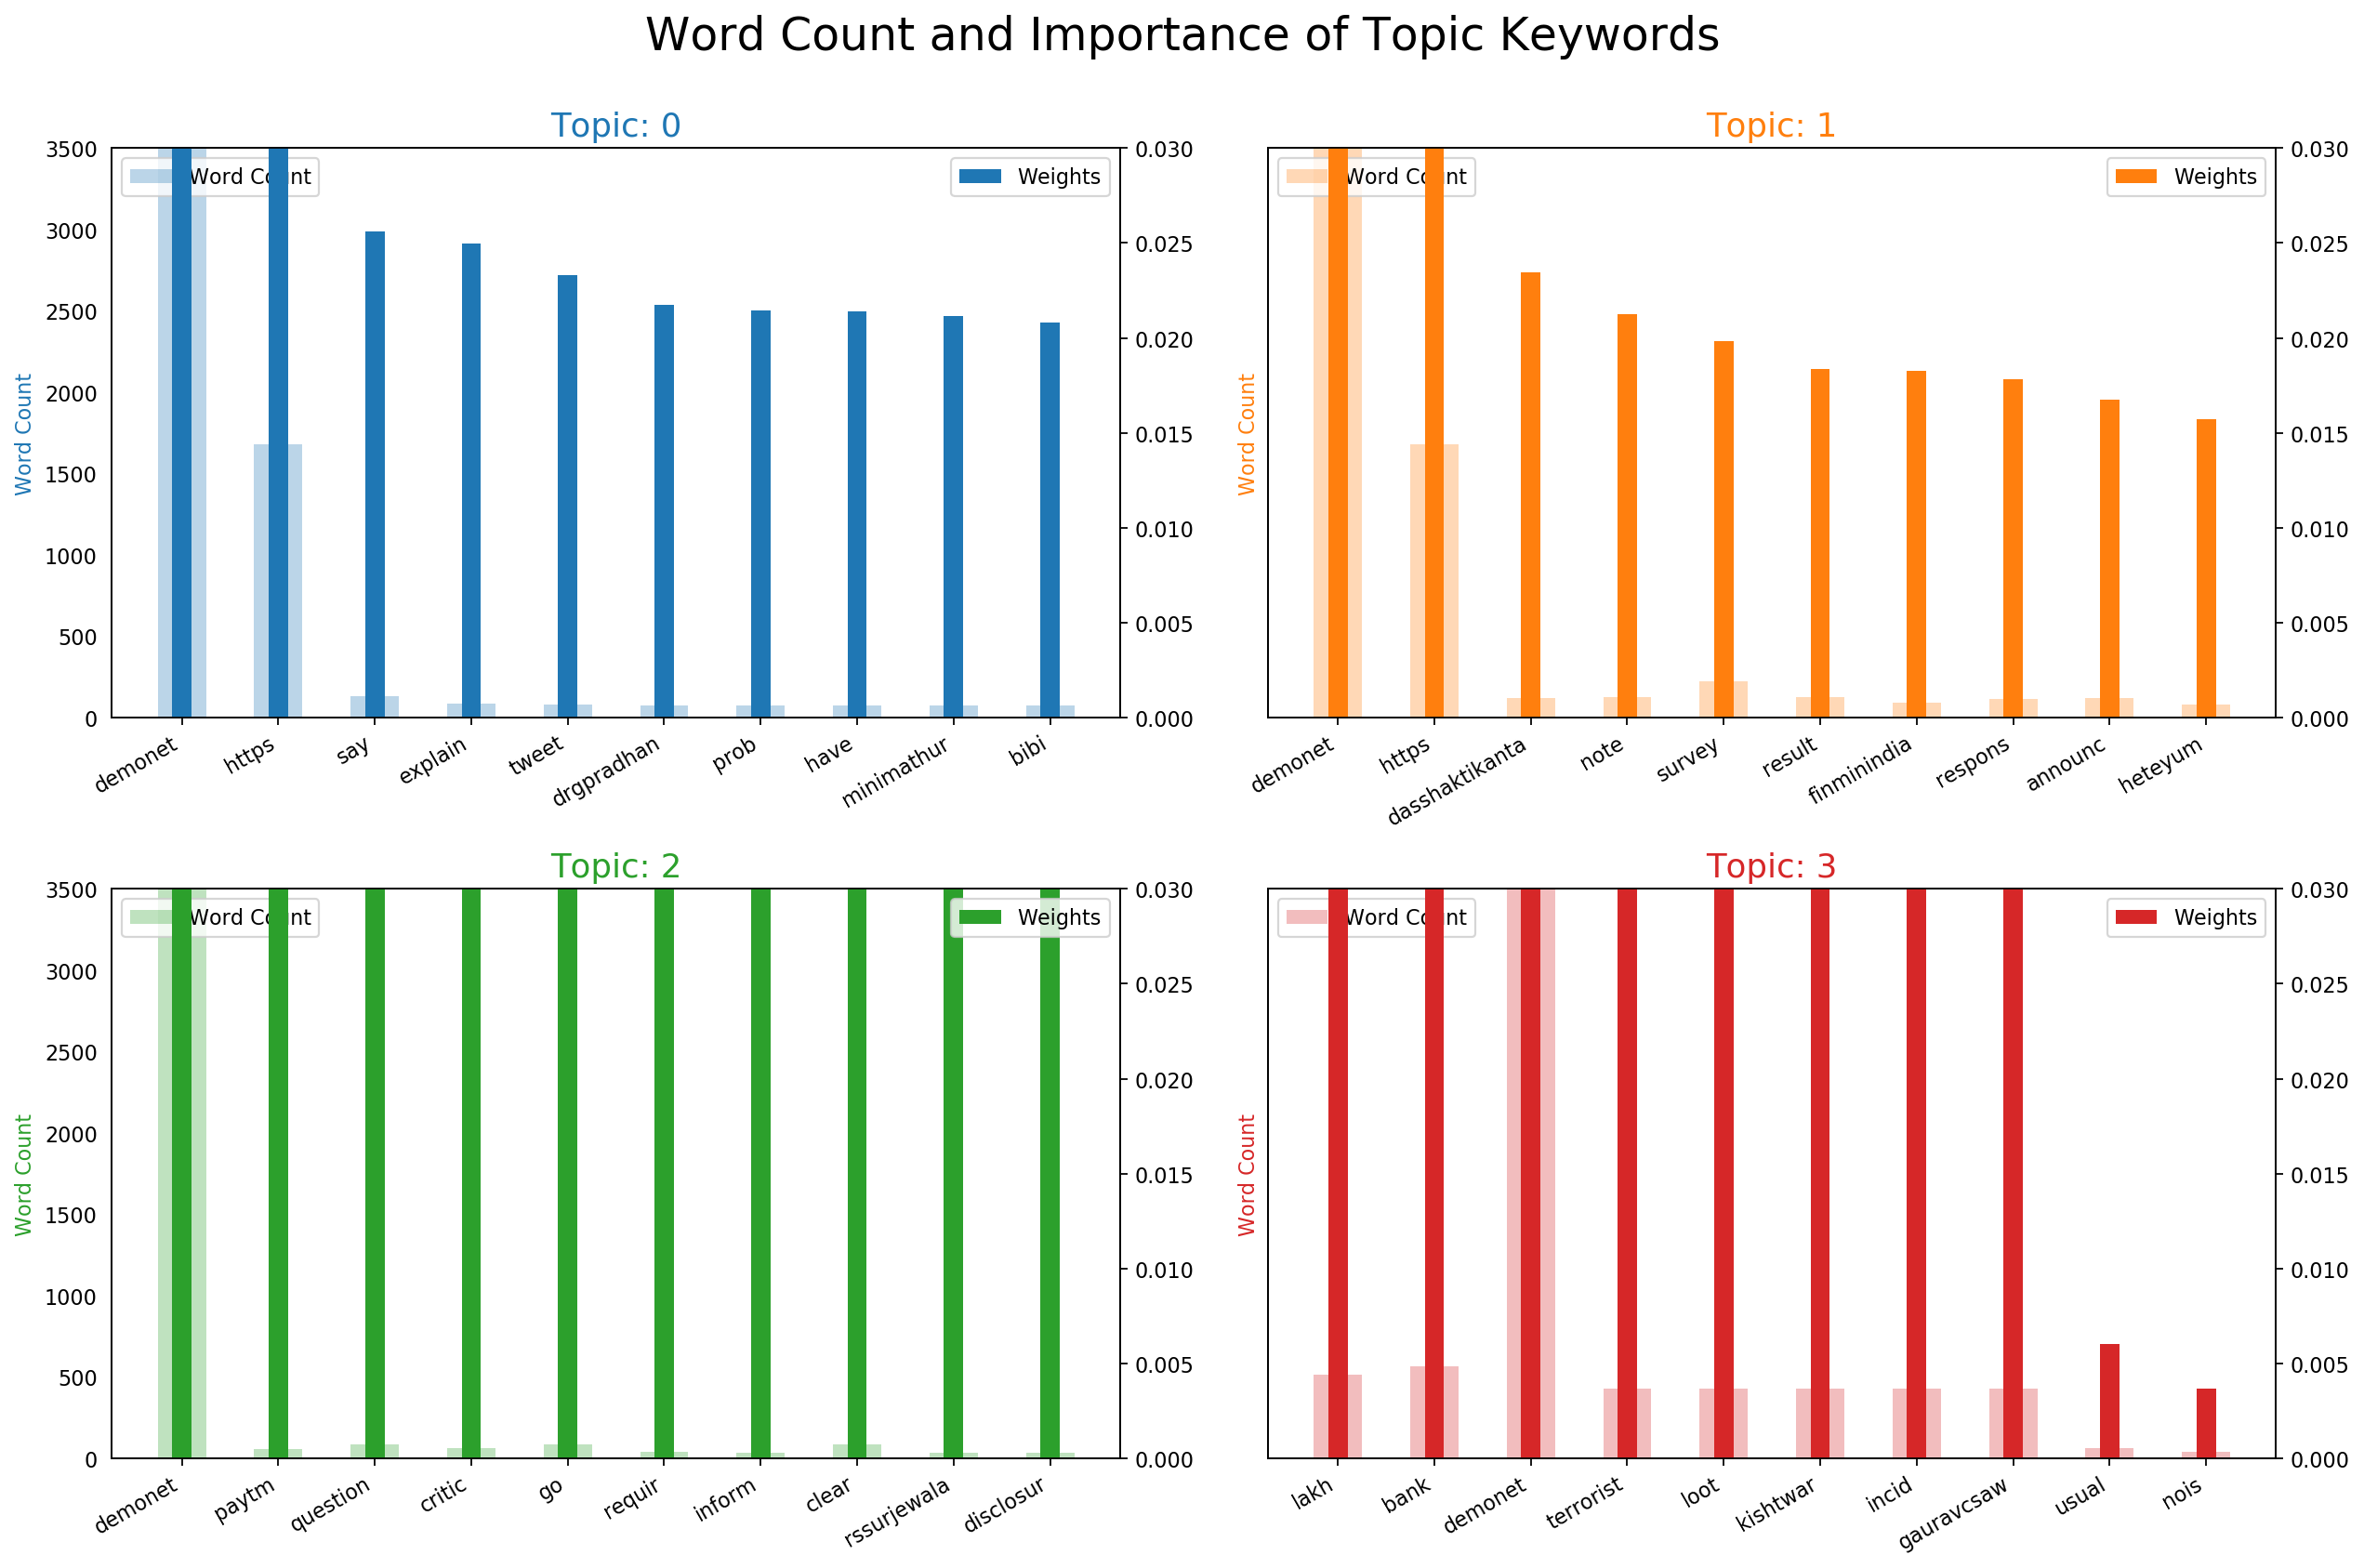

In [36]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    